In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [11]:
df_dk=pd.read_csv('./Keylogger_Detection.csv')
df_dk.head()

C:\Users\Joaquin Llenado\AppData\Local\Temp\ipykernel_28172\2859906962.py:1: DtypeWarning: Columns (48,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dk=pd.read_csv('./Keylogger_Detection.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451.0,52.6.25.230,443.0,6.0,04/08/2017 05:12:36,12140931.0,9.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892.0,172.217.3.99,443.0,6.0,04/08/2017 07:55:51,418882.0,102.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443.0,10.42.0.151,50750.0,6.0,04/08/2017 08:48:19,45.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025.0,10.42.0.1,53.0,17.0,04/08/2017 05:54:10,541699.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602.0,123.129.244.226,443.0,6.0,04/08/2017 08:44:25,7310795.0,3.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [12]:
df_dk.keys()

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

Data cleaning

In [38]:
Class_df = df_dk["Class"]
df_num = df_dk.select_dtypes(include=[np.number])
df_num = df_num.join(Class_df)

KeyboardInterrupt: 

In [14]:
#Drop unnecessary row "Unnamed"
df_num.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
#Drop any rows with NULL variables
print(df_num.isna().sum().sum())
df_num=df_num.dropna()

879


In [16]:
#Relabel "Class" column to "label" 
df_num["label"]=df_num["Class"]
df_num.loc[df_num.label == "Benign", 'label'] = 0
df_num.loc[df_num.label == "Keylogger", 'label'] = 1
df_num.drop('Class', axis=1, inplace=True)
df_num.sample(5)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
271147,57798.0,80.0,6.0,263266.0,1.0,1.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
489312,57537.0,443.0,6.0,106.0,2.0,0.0,31.0,0.0,31.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
504108,443.0,42696.0,6.0,2636.0,1.0,1.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
327789,37508.0,443.0,6.0,257603.0,3.0,0.0,31.0,0.0,31.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
423325,49231.0,80.0,6.0,63338.0,11.0,23.0,778.0,29917.0,778.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [17]:
df_num.groupby('label').size()

label
0    308813
1    214782
dtype: int64

In [18]:
for col in (df_num.iloc[:,:-1].columns):
    if(df_num[col].min()==df_num[col].max()):
            df_num.drop(col, axis=1, inplace=True)

In [19]:
#Standardization
def standardize(df,col):
    df[col]= (df[col]-df[col].mean())/(df[col].std())

for i in (df_num.iloc[:,:-1].columns):
    standardize (df_num,i)

df_num.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,-0.210447,-0.368579,-0.468868,0.042412,-0.004811,-0.036722,-0.013233,-0.038629,-0.021233,-0.212203,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
1,0.828487,-0.368579,-0.468868,-0.465677,0.945480,0.575336,-0.004001,0.556642,0.815442,-0.212203,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
2,-2.027848,2.839488,-0.468868,-0.483831,-0.076338,-0.055364,-0.018437,-0.046536,-0.435509,-0.212203,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
3,-0.821057,-0.393449,2.036972,-0.460353,-0.086556,-0.052257,-0.018736,-0.046050,-0.478832,0.522899,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
4,0.759549,-0.368579,-0.468868,-0.166949,-0.066120,-0.055364,-0.019463,-0.046536,-0.584432,-0.212203,...,0.004135,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0


In [20]:
#Set X equal to all columns except for "label"
features = [c for c in df_num.columns if c!="label"]

X = np.array(df_num[features].values)

print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(523595, 67)


In [21]:
#Set y equal to "label" column
target=["label"]

temp = np.array(df_num[target].values)
y = np.reshape(temp, -1)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(523595,)


In [22]:
#Convert y into int
y = y.astype(int)

In [23]:
#Check variables
print(X)
print(y)

[[-0.2104471  -0.36857886 -0.46886845 ... -0.12163621 -0.2964806
  -0.27762178]
 [ 0.82848741 -0.36857886 -0.46886845 ... -0.12163621 -0.2964806
  -0.27762178]
 [-2.02784769  2.83948811 -0.46886845 ... -0.12163621 -0.2964806
  -0.27762178]
 ...
 [ 1.20807446 -0.3917273  -0.46886845 ... -0.12163621 -0.2964806
  -0.27762178]
 [ 0.76606904 -0.36857886 -0.46886845 ... -0.12163621 -0.2964806
  -0.27762178]
 [-2.02784769  2.64301338 -0.46886845 ... -0.12163621 -0.2964806
  -0.27762178]]
[0 0 0 ... 0 0 1]


In [24]:
#Test using 20% of dataset, Train using the remaining 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((418876, 67), (104719, 67), (418876,), (104719,))

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
predictedResults = rf.predict(X_test)
boolMaskOfWrongCases = (predictedResults != y_test)

print("The number of wrongly predicted cases is ", boolMaskOfWrongCases.sum() )

print("The accuracy of prediction is ", 1- boolMaskOfWrongCases.sum()/ 104719 )

The number of wrongly predicted cases is  2516
The accuracy of prediction is  0.9759737965412199


In [29]:
print("Accuracy of RF prediction on testing dataset: ",  rf.score(X_test, y_test))

Accuracy of RF prediction on testing dataset:  0.9759737965412199


In [30]:
print("Accuracy of RF prediction on training dataset: ",  rf.score(X_train, y_train))

Accuracy of RF prediction on training dataset:  0.9993792912460967


In [31]:
#View AUC
y_pred = rf.predict(X_test)
AUC = metrics.roc_auc_score(y_test,y_pred)
print("AUC: {:.3f}".format(AUC))

AUC: 0.974


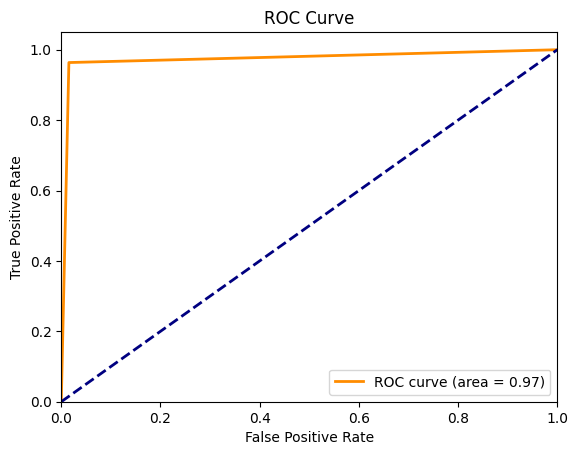

In [32]:
def generate_results(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
generate_results(y_test, y_pred)

In [35]:
import joblib

In [37]:
joblib.dump(rf, 'keylogger-detection-model')

['keylogger-detection-model']

In [44]:
from sklearn.preprocessing import LabelEncoder